# i. Perkenalan

Nama    : Ibrahim Hasan

Batch   : FTDS009

Dataset yang digunakan adalah tentang behaviour penggunaan kartu kredit oleh customer.

Objektif yang ingin dicapai adalah membuat model unsupervised learning clustering untuk segmentasi customer.

# ii. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

# iii. Data Loading

Data berisikan 8950 baris dan 18 kolom.

In [2]:
df = pd.read_csv('CC GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Observasi missing value dan mendapatkan kolom `MINIMUM_PAYMENTS` dan `CREDIT_LIMIT` terdapat missing value.

In [3]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

# iv. EDA

Slicing data frekuensi transaksi untuk feature `PURCHASES_TRX` dan `CASH_ADVANCE_TRX` untuk melihat insight.

In [4]:
freq = df.drop(['CUST_ID','PURCHASES_INSTALLMENTS_FREQUENCY', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'], axis=1)

Slicing data total nilai transaksi untuk cash advance dan purchases untuk mendapatkan insight.

In [5]:
spend = df.drop(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','PURCHASES_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'TENURE'], axis=1)

Dari total frekuensi transaksi, dapat diketahui bahwa mayoritas pengguna menggunakan kartu kreditnya untuk membeli barang/jasa sebanyak 131653 kali. Sedangkan pengguna memakai kartu kreditnya untuk cash advance sebanyak 29077 kali.

In [6]:
freq.sum()

CASH_ADVANCE_TRX     29077
PURCHASES_TRX       131653
dtype: int64

Visualisasi perbandingan frekuensi pengguna menggunakan kartu kredit dan cash advance.

<AxesSubplot:>

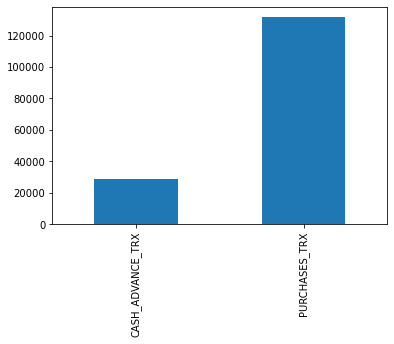

In [7]:
freq.sum().plot(kind="bar")

Tetapi pada nilai total transaksi, selisih dari penggunaan kartu kredit untuk pembelian barang dan jasa dengan penarikan cash advance ternyata tidak terlalu signifikan. penggunaan kartu kredit untuk pembelian barang dan jasa sebesar USD 8,978,683 dan penggunaan kartu kredit untuk cash advance sebesar USD 8,760,896.

In [8]:
spend.sum()

PURCHASES       8.978683e+06
CASH_ADVANCE    8.760896e+06
dtype: float64

Visualisasi perbandingan nilai total transaksi antara purchases dan cash advance.

<AxesSubplot:>

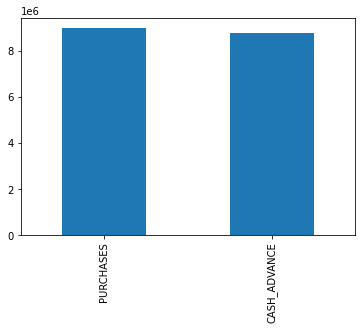

In [9]:
spend.sum().plot(kind="bar")

Kesimpulan insight dari EDA :

    - Mayoritas pengguna menggunakan kartu kredit untuk membeli barang/jasa sebanyak 131653 kali.
    - Pengguna memakai kartu kreditnya untuk cash advance sebanyak 29077 kali.
    - Penggunaan kartu kredit untuk pembelian barang dan jasa sebesar USD 8,978,683 dan penggunaan kartu kredit untuk cash advance sebesar USD 8,760,896.
    - Nilai total transaksi antara purchases dan cash advance sebesar USD 8,976,890.
    - Dapat diartikan nilai transaksi pada cash advance cenderung dalam jumlah yang besar karena secara frekuensi lebih sedikit, tetapi nilai total transaksi tidak berbeda signifikan.

Observasi data dengan describe(), dan terlihat mean dari data `PURCHASES_TRX` dan `CASH_ADVANCE_TRX` sebagai frekuensi masing-masing produk terpaut selisih jauh, yaitu 14 kali untuk purchases, dan 3 kali untuk cash advance, tetapi jika dilihat dari mean purchases yang sebesar USD 1003, dan mean dari cash advance yang sebesar USD 978, selisih antara mean kedua nilai transaksi tersebut cenderung tidak signifikan sesuai dengan insight pada EDA sebelumnya.

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [11]:
df0 = df.drop(['CUST_ID'], axis=1)

Observasi outlier pada numeric data dan mendapatkan hampir seluruh feature terdapat oulier yang bersifat natural outlier. oleh karena itu penulis mengambil keputusan untuk tidak melakukan handling outlier pada pengujian ini. 

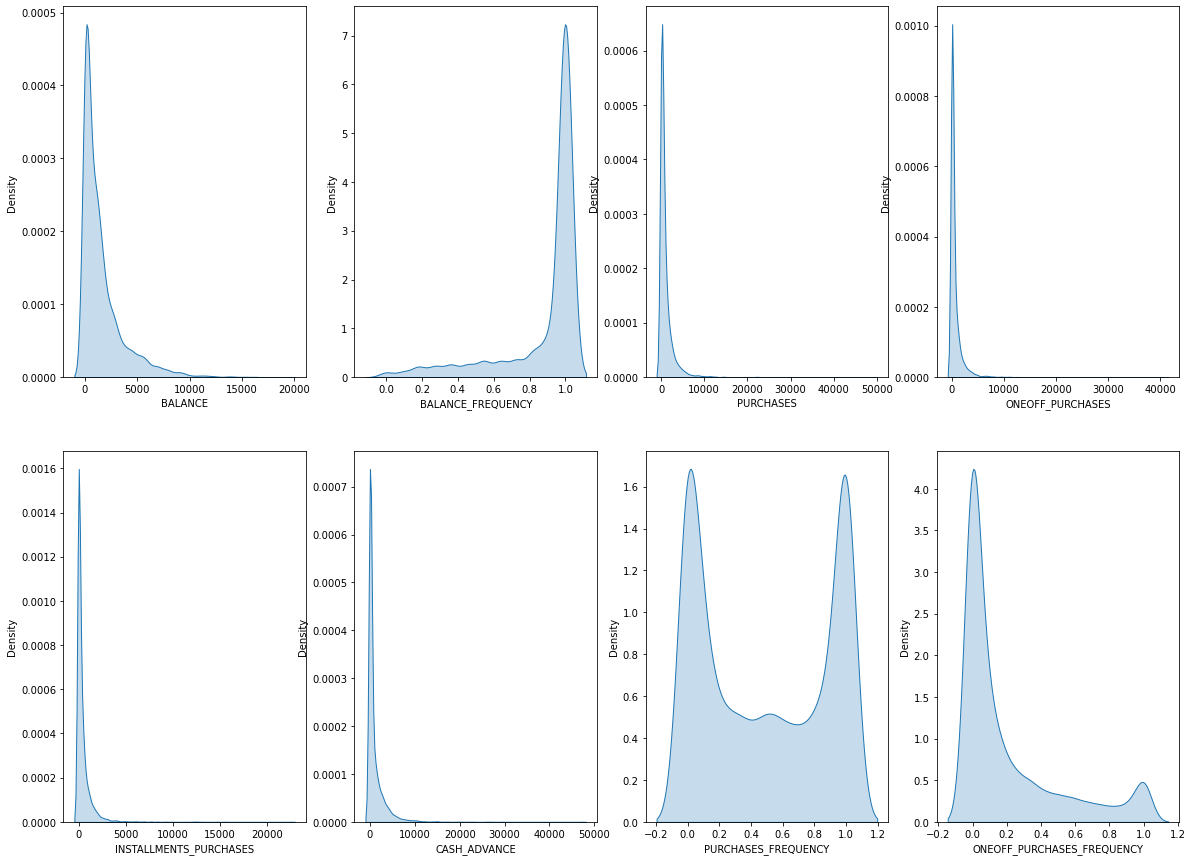

In [12]:
fig,axes=plt.subplots(nrows=2,ncols=4,figsize=(20,15))
i=0
j=0
for col in df0.columns:
    sns.kdeplot(data=df0, x=col, fill=True,ax=axes[i][j])
    j+=1
    if j>3:
        i+=1
        j=0
    if i==2:
        break

# v. Data Preprocessing

Drop index yang memiliki missing value dan menyisakan 8636 baris data.

In [13]:
df.dropna(inplace=True)
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Drop feature `CUST_ID` yang bukan merupakan numerikal feature

In [14]:
df_clean = df.drop(['CUST_ID'], axis=1)
df_clean

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Menunjuk 10 baris inference setelah data dibersihkan.

In [15]:
d_inf = df_clean.sample(10, random_state=39)

Drop data inference.

In [16]:
df_1 = df_clean.drop(d_inf.index)
df_1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [17]:
df_1.reset_index(inplace=True)

In [18]:
df_1.drop(['index'], axis=1, inplace=True)
df_1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8621,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8622,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8623,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8624,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [19]:
scaler = MinMaxScaler()
scaler.fit(df_1)

df_scaled = scaler.transform(df_1)
df_scaled

array([[2.14779454e-03, 8.18182000e-01, 1.94536779e-03, ...,
        1.82564563e-03, 0.00000000e+00, 1.00000000e+00],
       [1.68169097e-01, 9.09091000e-01, 0.00000000e+00, ...,
        1.40344791e-02, 2.22222000e-01, 1.00000000e+00],
       [1.31026136e-01, 1.00000000e+00, 1.57662475e-02, ...,
        8.20961806e-03, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.22871936e-03, 8.33333000e-01, 2.94456089e-03, ...,
        1.07843629e-03, 2.50000000e-01, 0.00000000e+00],
       [7.06688341e-04, 8.33333000e-01, 0.00000000e+00, ...,
        7.29475795e-04, 2.50000000e-01, 0.00000000e+00],
       [1.95717777e-02, 6.66667000e-01, 2.22932216e-02, ...,
        1.15527021e-03, 0.00000000e+00, 0.00000000e+00]])

In [20]:
df_scaled.shape

(8626, 17)

Observasi PCA dengan seluruh kolom (17)

In [21]:
pc=PCA(n_components=17)
cr_pca=pc.fit(df_scaled)

In [22]:
sum(cr_pca.explained_variance_ratio_)

1.0

Observasi VIF value seluruh kolom dan mendapatkan 7 kolom dengan nilai VIF > 5.

In [23]:
vif_data = pd.DataFrame()
vif_data["feature"] = df_1.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_1.values, i) for i in range(len(df_1.columns))]

vif_data

,feature,VIF
0,BALANCE,4.157311
1,BALANCE_FREQUENCY,23.121831
2,PURCHASES,58486.398781
3,ONEOFF_PURCHASES,32598.373807
4,INSTALLMENTS_PURCHASES,10353.758006
5,CASH_ADVANCE,3.533914
6,PURCHASES_FREQUENCY,26.498914
7,ONEOFF_PURCHASES_FREQUENCY,5.687726
8,PURCHASES_INSTALLMENTS_FREQUENCY,17.195315
9,CASH_ADVANCE_FREQUENCY,4.960203


Observasi EVR dengan data PCA dan mengambil keputusan akan menggunakan PCA 5 komponen yang mewakili 90.9% informasi dari dataset.

In [24]:
var_ratio={}
for i in range(2,18):
    pc=PCA(n_components=i)
    cr_pca=pc.fit(df_scaled)
    var_ratio[i]=sum(cr_pca.explained_variance_ratio_)

In [25]:
var_ratio

{2: 0.6458607550415005,
 3: 0.778792248388127,
 4: 0.8522202326080722,
 5: 0.9093170087733663,
 6: 0.9456520205477408,
 7: 0.9642920999829349,
 8: 0.9782311311291437,
 9: 0.9849651433857306,
 10: 0.990683699980443,
 11: 0.993633253158113,
 12: 0.9955697402304112,
 13: 0.9968840226151727,
 14: 0.9981686464424389,
 15: 0.9992757386753576,
 16: 0.9999999670685026,
 17: 1.0}

Menggunakan 5 components (90.9%) dengan data PCA.

In [26]:
pc=PCA(n_components=5)

In [27]:
p=pc.fit(df_scaled)

Visualisasi hasil PCA 5 components.

<AxesSubplot:>

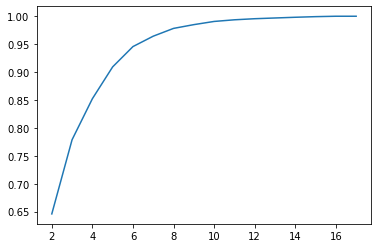

In [28]:
pd.Series(var_ratio).plot()

Transformasi data dengan PCA 5 components.

In [29]:
pca_5 = PCA(n_components=5).fit(df_scaled)

pca_5_trans = pca_5.fit_transform(df_scaled)

In [30]:
pca_5_trans.shape

(8626, 5)

In [31]:
df_2 = pd.DataFrame(pca_5_trans)
df_2

,0,1,2,3,4
0,-0.491985,-0.106859,-0.024845,-0.089954,0.126845
1,-0.620675,-0.030331,0.111823,-0.144980,-0.164820
2,0.291620,0.923178,-0.132426,0.056350,0.160616
3,-0.567776,0.023145,-0.070008,-0.106478,-0.026805
4,0.188112,-0.249023,-0.229521,-0.072961,0.012225
...,...,...,...,...,...
8621,-0.563029,-0.057008,0.207339,0.924718,0.278421
8622,0.641623,-0.441051,0.266803,0.858753,-0.249106
8623,0.357178,-0.397856,0.143095,0.895417,-0.038209
8624,-0.650107,-0.171650,0.310047,0.838884,-0.161699


In [32]:
col_list = df_clean.columns
col_list

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

Dataframe masing-masing feature PCA 5 komponen.

In [33]:
pd.DataFrame(pca_5.components_.T, columns=['F_'+str(i) for i in range(5)], index=col_list)

,F_0,F_1,F_2,F_3,F_4
BALANCE,-0.018586,0.070016,-0.167324,-0.020050,-0.189138
BALANCE_FREQUENCY,0.082482,0.135886,-0.339476,-0.089585,-0.812462
PURCHASES,0.033246,0.049875,0.001781,-0.007454,-0.003688
ONEOFF_PURCHASES,0.020286,0.061732,0.005175,-0.002172,0.000697
INSTALLMENTS_PURCHASES,0.035723,-0.003165,-0.005489,-0.012317,-0.009282
CASH_ADVANCE,-0.017677,0.007793,-0.026226,0.014845,-0.072427
PURCHASES_FREQUENCY,0.685062,0.084656,-0.076312,0.104637,0.101118
ONEOFF_PURCHASES_FREQUENCY,0.243940,0.856609,0.030387,0.092770,0.144004
PURCHASES_INSTALLMENTS_FREQUENCY,0.638227,-0.444710,-0.174879,-0.026593,0.009380
CASH_ADVANCE_FREQUENCY,-0.078072,0.030032,-0.120434,0.099738,-0.297479


Nilai EVR dari masing-masing komponen PCA 5 components.

In [34]:
pd.Series(pca_5.explained_variance_ratio_,index=['F_'+str(i) for i in range(5)])

F_0    0.504023
F_1    0.141837
F_2    0.132931
F_3    0.073428
F_4    0.057097
dtype: float64

# vi. Model Definition

Untuk pengujian clustering kali ini menggunakan K-Means Clustering dengan k = 2, Dimana dengan indikator inersia dan silhouette coefficient menghasilkan 2 cluster merupakan yang paling optimal.

Definisi model K-Means Clustering dengan 2 cluster.

# vii. Model Training

In [35]:
km_2 = KMeans(n_clusters=2, random_state=123)

training model K-Means Clustering dengan PCA 5 komponen.

In [36]:
km_2.fit(pca_5_trans)

KMeans(n_clusters=2, random_state=123)

In [37]:
y_pred = km_2.fit_predict(pca_5_trans)

In [38]:
km_2.labels_

array([0, 0, 1, ..., 1, 0, 0], dtype=int32)

Perhitungan nilai inertia masing-masing cluster.

In [39]:
km_range = range(1,10)
cluster_errors = []

for num_clusters in km_range:
    clusters = KMeans(num_clusters)
    clusters.fit(pca_5_trans)
    cluster_errors.append(clusters.inertia_)

In [40]:
clusters_df = pd.DataFrame({"cluster":km_range, "inertia":cluster_errors})
clusters_df[0:10]


,cluster,inertia
0,1,5122.631901
1,2,2786.971537
2,3,2229.144084
3,4,1905.790984
4,5,1644.291349
5,6,1481.048828
6,7,1272.281566
7,8,1120.331678
8,9,1007.601048


In [41]:
clusters_df_1 = pd.DataFrame({"inertia":cluster_errors})
clusters_df_1

,inertia
0,5122.631901
1,2786.971537
2,2229.144084
3,1905.790984
4,1644.291349
5,1481.048828
6,1272.281566
7,1120.331678
8,1007.601048


Perhitungan selisih antara cluster, didapatkan cluster ke-2 dengan selisih yang sudah cenderung stabil jika dibandingkan pada nilai kluster selanjutnya.

In [42]:
selisih = list(np.diff(clusters_df_1.iloc[:,0]))
selisih.insert(0,0)

skor = pd.DataFrame(cluster_errors, columns=['inertia'])
skor['selisih'] = selisih

skor['k'] = list(np.arange(1,10))
skor

,inertia,selisih,k
0,5122.631901,0.000000,1
1,2786.971537,-2335.660364,2
2,2229.144084,-557.827453,3
3,1905.790984,-323.353100,4
4,1644.291349,-261.499635,5
5,1481.048828,-163.242521,6
6,1272.281566,-208.767262,7
7,1120.331678,-151.949887,8
8,1007.601048,-112.730630,9


Visualisasi Elbow method yang menunjukkan patahan pada cluster ke-2.

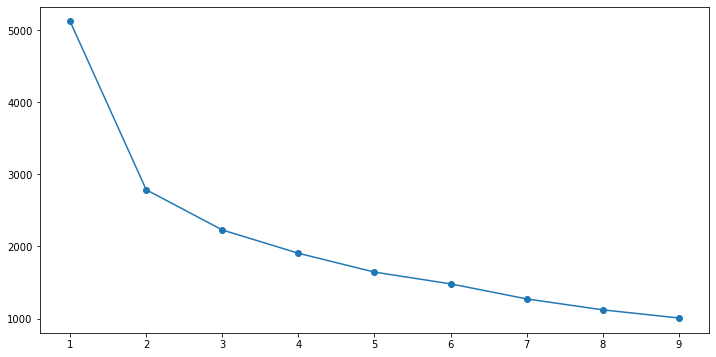

In [43]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.cluster, clusters_df.inertia, marker='o')


Silhouette score yang menunjukkan cluster ke-2 merupakan nilai tertinggi dengan nilai 0.432.

In [44]:
km_range_2 = range(2,10)
scores = []
for k in km_range_2:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(pca_5_trans)
    scores.append(metrics.silhouette_score(pca_5_trans, km.labels_))

In [45]:
scores

[0.4324681617728119,
 0.4205852231549643,
 0.4275103185041645,
 0.37522620022822706,
 0.3962961996127141,
 0.40326419353425796,
 0.39902691996440415,
 0.4132659349898716]

Visualisasi silhouette score dimana k = 2 merupakan nilai tertinggi, disusul k = 4 ditempat kedua.

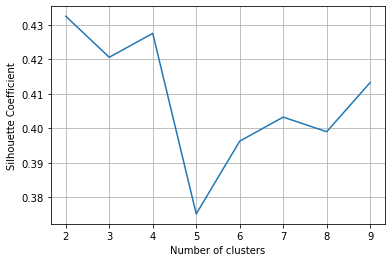

In [46]:
plt.plot(km_range_2, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)


Visualisasi persebaran data dengan k = 2, dimana persebaran terlihat jelas dan mayoritas data berada di sebelah kanan berwarna biru.

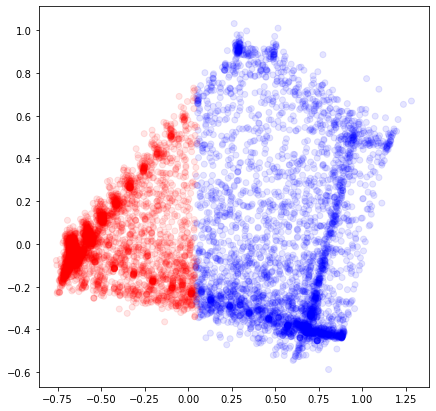

In [47]:
color_map={0:'r',1:'b',2:'g',3:'y',4:'c',5:'m'}
label_color=[color_map[l] for l in km_2.labels_]
plt.figure(figsize=(7,7))
plt.scatter(pca_5_trans[:,0],pca_5_trans[:,1],c=label_color,cmap='Spectral',alpha=0.1)

In [48]:
df_pair_plot=pd.DataFrame(pca_5_trans,columns=['F_' +str(i) for i in range(5)])

In [49]:
df_pair_plot['Cluster']=km_2.labels_
df_pair_plot.head()

,F_0,F_1,F_2,F_3,F_4,Cluster
0,-0.491985,-0.106859,-0.024845,-0.089954,0.126845,0
1,-0.620675,-0.030331,0.111823,-0.144980,-0.164820,0
2,0.291620,0.923178,-0.132426,0.056350,0.160616,1
3,-0.567776,0.023145,-0.070008,-0.106478,-0.026805,0
4,0.188112,-0.249023,-0.229521,-0.072961,0.012225,1


Visualisasi persebaran data dari masing-masing komponen PCA 5 komponen.

/Users/ibrahimhasan/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


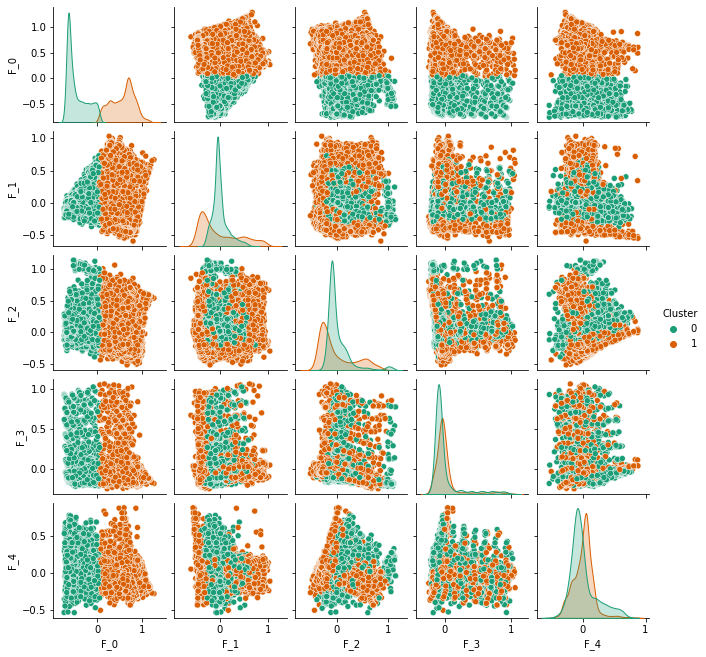

In [50]:
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

Hasil data clustering dengan k = 2 untuk masing-masing baris/customer.

In [51]:
cl3 = pd.DataFrame(km_2.labels_, columns=['Cluster']) + 1
cl3

,Cluster
0,1
1,1
2,2
3,1
4,2
...,...
8621,1
8622,2
8623,2
8624,1


Concat dataframe dengan cluster k = 2.

In [52]:
cluster_df_3 = pd.concat([df_1, cl3], axis=1)
cluster_df_3

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8621,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,1
8622,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,2
8623,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,2
8624,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


Perbandingan density cluster 1 dan 2.

In [53]:
cluster_df_3.Cluster.value_counts()

1    4693
2    3933
Name: Cluster, dtype: int64

Perbandingan mean dari masing-masing cluster untuk semua feature.

In [54]:
cluster_4 = cluster_df_3.groupby('Cluster').mean().T
cluster_4

Cluster,1,2
BALANCE,1754.381361,1418.559133
BALANCE_FREQUENCY,0.852926,0.945610
PURCHASES,329.510026,1855.649883
ONEOFF_PURCHASES,261.329859,1014.542121
INSTALLMENTS_PURCHASES,68.428057,841.495070
CASH_ADVANCE,1347.270554,572.847111
PURCHASES_FREQUENCY,0.162621,0.893747
ONEOFF_PURCHASES_FREQUENCY,0.094844,0.338376
PURCHASES_INSTALLMENTS_FREQUENCY,0.066518,0.729470
CASH_ADVANCE_FREQUENCY,0.187517,0.078100


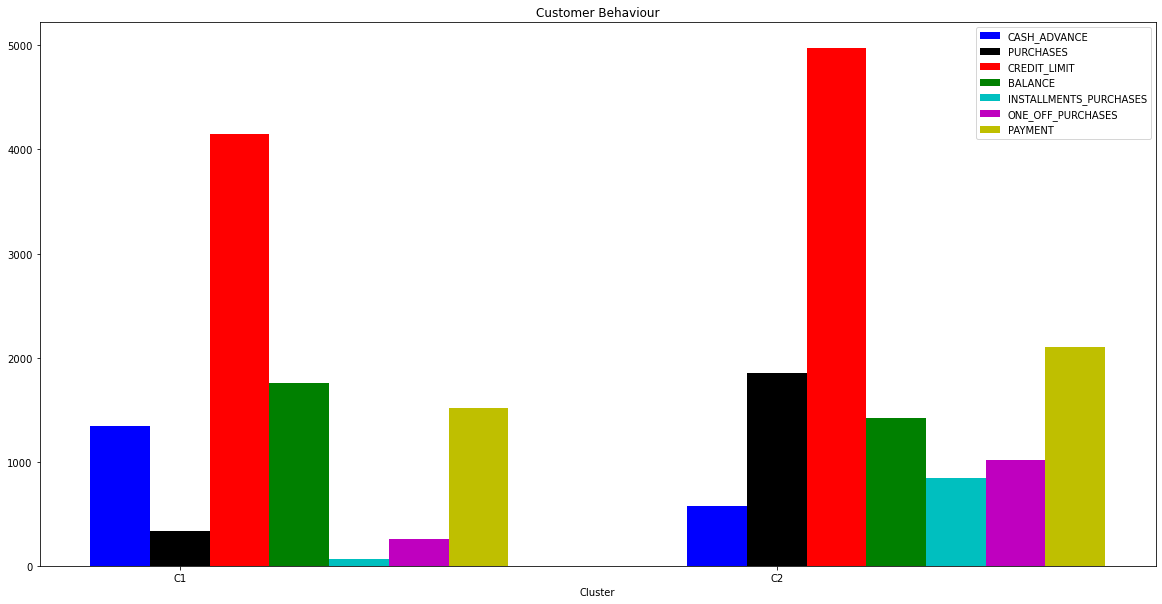

In [55]:
fig,ax=plt.subplots(figsize=(20,10))
index = np.arange(len(cluster_4.columns))

balances = cluster_4.loc['BALANCE'].values
cash_advance = cluster_4.loc['CASH_ADVANCE'].values
installment_purch = cluster_4.loc['INSTALLMENTS_PURCHASES'].values
purchase = cluster_4.loc['PURCHASES'].values
limit = cluster_4.loc['CREDIT_LIMIT'].values
oneoff = cluster_4.loc['ONEOFF_PURCHASES'].values
payment = cluster_4.loc['PAYMENTS'].values

bar_width = 0.1
b1 = plt.bar(index, cash_advance, color='b', label='CASH_ADVANCE', width=bar_width)
b2 = plt.bar(index + bar_width, purchase, color='k', label='PURCHASES', width=bar_width)
b3 = plt.bar(index + 2*bar_width, limit, color='r', label='CREDIT_LIMIT', width=bar_width)
b4 = plt.bar(index + 3*bar_width, balances, color='g', label='BALANCE', width=bar_width)
b5 = plt.bar(index + 4*bar_width, installment_purch, color='c', label='INSTALLMENTS_PURCHASES', width=bar_width)
b6 = plt.bar(index + 5*bar_width, oneoff, color='m', label='ONE_OFF_PURCHASES', width=bar_width)
b7 = plt.bar(index + 6*bar_width, payment, color='y', label='PAYMENT', width=bar_width)



plt.xlabel('Cluster')
plt.title('Customer Behaviour')
plt.xticks(index + bar_width, ('C1', 'C2'))
plt.legend()

insight EDA setelah clustering dengan k = 2.

1. cluster 2 merupakan pengguna aktif dengan kelas premium ditandai dengan limit yang besar. cluster 2 menggunakan kartu kredit untuk pembelian barang dan jasa, baik dengan cicilan maupun one_off purchases sehingga menyisakan balance yang lebih kecil dibanding cluster 1. Jika ingin diberikan promo, dapat berupa cicilan 0% untuk pembelanjaan barang dan jasa, atau promo untuk pembelanjaan barang dan jasa.


2. cluster 1 merupakan pengguna reguler yang lebih mengutamakan untuk cash advance. Cluster 1 jarang berbelanja dengan kartu kredit, cicilan, ataupun one_off purchase sehingga memiliki balance yang lebih tinggi. jika ingin diberikan promo, dapat berupa kemudahan penarikan cash advance, 0% fee cash advance, konversi cicilan 0% untuk cash advance, atau produk lain seperti KTA.


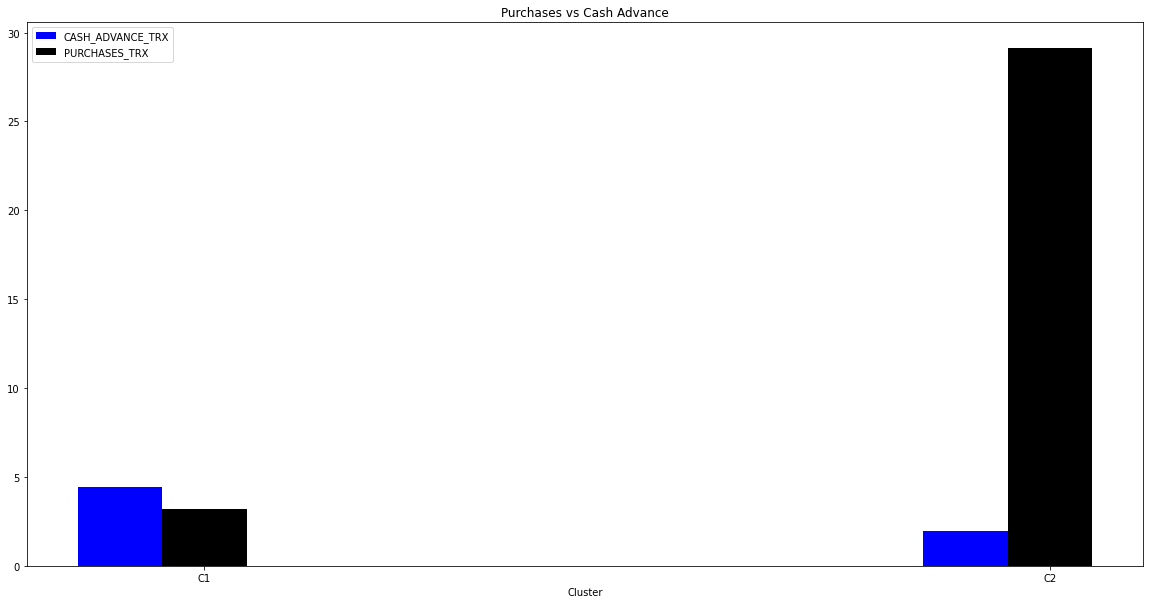

In [56]:
fig,ax=plt.subplots(figsize=(20,10))
index = np.arange(len(cluster_4.columns))

cash_adv_trx = cluster_4.loc['CASH_ADVANCE_TRX'].values
purchase_trx = cluster_4.loc['PURCHASES_TRX'].values

bar_width = 0.1
b1 = plt.bar(index, cash_adv_trx, color='b', label='CASH_ADVANCE_TRX', width=bar_width)
b2 = plt.bar(index + bar_width, purchase_trx, color='k', label='PURCHASES_TRX', width=bar_width)

plt.xlabel('Cluster')
plt.title('Purchases vs Cash Advance')
plt.xticks(index + bar_width, ('C1', 'C2'))
plt.legend()

In [57]:
cluster_df_3.Cluster.value_counts()

1    4693
2    3933
Name: Cluster, dtype: int64

In [58]:
freq_c = cluster_df_3.drop(['PURCHASES_INSTALLMENTS_FREQUENCY', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'], axis=1)

PCA N Component = 2

In [59]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(pca_data,columns=['F_0','F_1'])
pca_df['Cluster']= y_pred + 1

In [60]:
fig = px.scatter(pca_df, x="F_0", y="F_1", color="Cluster", hover_name="Cluster")
fig.show()

Training dengan model Agglomerative Clustering dengan k = 2.

In [61]:
agg = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

In [62]:
agg.fit(pca_5_trans)

AgglomerativeClustering()

Visualisasi persebaran data dengan model Agglomerative Clustering, tampak masih terjadi persebaran data yang tumpang tindih.

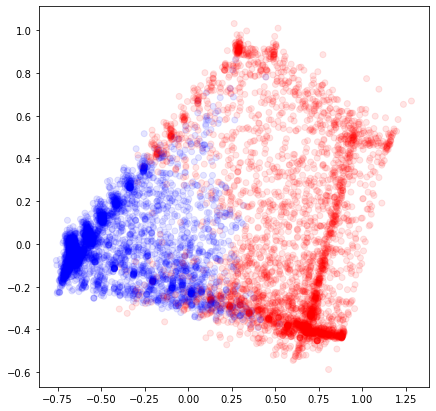

In [63]:
color_map={0:'r',1:'b',2:'g',3:'y',4:'c',5:'m'}
label_color=[color_map[l] for l in agg.labels_]
plt.figure(figsize=(7,7))
plt.scatter(pca_5_trans[:,0],pca_5_trans[:,1],c=label_color,cmap='Spectral',alpha=0.1)

Train model dengan algoritma DBScan dengan epsilon = 0.5 dan min_samples = 5.

In [64]:
dbscan = DBSCAN(eps=0.05, min_samples=5)

In [66]:
dbscan.fit(pca_5_trans)

DBSCAN(eps=0.05)

In [69]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(df_scaled)

DBSCAN(eps=0.2)

In [67]:
def plot_dbscan(dbscan, df_scaled, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = df_scaled[anomalies_mask]
    non_cores = df_scaled[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

Visualisasi persebaran data dengan model DBScan yang terlihat hasil clustering yang tidak terlihat jelas perbedaan antar clusternya.

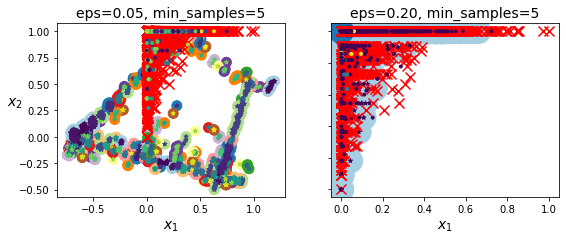

In [71]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, df_scaled, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, df_scaled, size=600, show_ylabels=False)

plt.show()

# viii. Model Evaluation

1. Model terbaik adalah Kmeans Clustering karena dapat menghasilkan cluster yang optimal dengan pemisahan yang jelas pada setiap clusternya.

2. Cluster terbaik adalah dengan k = 2 dengan nilai silhouette score tertinggi.

# Inference

In [ ]:
d_inf_ind = d_inf.reset_index(drop=True)
d_inf_ind

,level_0,index,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,8070,651.559860,1.000000,599.55,599.55,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,5,1800.000000,199.706361,388.868388,0.000000,12
1,1,3451,634.088475,0.750000,2194.29,2065.25,129.04,0.000000,0.750000,0.625000,0.375000,0.000000,0,14,10000.000000,408.701268,201.735817,0.200000,8
2,2,421,1452.437463,1.000000,0.00,0.00,0.00,114.918715,0.000000,0.000000,0.000000,0.250000,3,0,1500.000000,331.670616,479.771774,0.000000,12
3,3,7373,328.436912,0.727273,2738.82,2408.82,330.00,0.000000,0.583333,0.333333,0.333333,0.000000,0,31,1000.000000,2339.534377,364.972830,0.500000,12
4,4,736,0.255710,0.090909,24.00,0.00,24.00,0.000000,0.166667,0.000000,0.166667,0.000000,0,2,1500.000000,9.533313,8.842600,0.000000,12
5,5,3621,58.811557,0.636364,370.00,370.00,0.00,19.719684,0.083333,0.083333,0.000000,0.083333,1,1,1200.000000,1483.573731,144.531014,0.090909,12
6,6,7138,1432.654644,1.000000,604.52,178.16,426.36,0.000000,1.000000,0.250000,1.000000,0.000000,0,17,1400.000000,611.086937,901.913989,0.000000,12
7,7,7385,61.653547,0.454545,1194.22,0.00,1194.22,0.000000,0.666667,0.000000,0.666667,0.000000,0,20,3777.777778,1775.371596,101.147508,0.000000,12
8,8,7427,9220.534572,1.000000,1420.31,777.66,642.65,9816.782544,1.000000,0.250000,1.000000,0.833333,29,77,12500.000000,4257.372749,4696.075967,0.000000,12
9,9,4257,1832.940008,1.000000,1839.69,914.19,925.50,0.000000,0.583333,0.416667,0.416667,0.000000,0,35,5000.000000,477.773934,602.380043,0.000000,12


In [ ]:
d_inf2 = d_inf_ind.drop(['index','level_0'], axis=1)
d_inf2

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,651.559860,1.000000,599.55,599.55,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,5,1800.000000,199.706361,388.868388,0.000000,12
1,634.088475,0.750000,2194.29,2065.25,129.04,0.000000,0.750000,0.625000,0.375000,0.000000,0,14,10000.000000,408.701268,201.735817,0.200000,8
2,1452.437463,1.000000,0.00,0.00,0.00,114.918715,0.000000,0.000000,0.000000,0.250000,3,0,1500.000000,331.670616,479.771774,0.000000,12
3,328.436912,0.727273,2738.82,2408.82,330.00,0.000000,0.583333,0.333333,0.333333,0.000000,0,31,1000.000000,2339.534377,364.972830,0.500000,12
4,0.255710,0.090909,24.00,0.00,24.00,0.000000,0.166667,0.000000,0.166667,0.000000,0,2,1500.000000,9.533313,8.842600,0.000000,12
5,58.811557,0.636364,370.00,370.00,0.00,19.719684,0.083333,0.083333,0.000000,0.083333,1,1,1200.000000,1483.573731,144.531014,0.090909,12
6,1432.654644,1.000000,604.52,178.16,426.36,0.000000,1.000000,0.250000,1.000000,0.000000,0,17,1400.000000,611.086937,901.913989,0.000000,12
7,61.653547,0.454545,1194.22,0.00,1194.22,0.000000,0.666667,0.000000,0.666667,0.000000,0,20,3777.777778,1775.371596,101.147508,0.000000,12
8,9220.534572,1.000000,1420.31,777.66,642.65,9816.782544,1.000000,0.250000,1.000000,0.833333,29,77,12500.000000,4257.372749,4696.075967,0.000000,12
9,1832.940008,1.000000,1839.69,914.19,925.50,0.000000,0.583333,0.416667,0.416667,0.000000,0,35,5000.000000,477.773934,602.380043,0.000000,12


In [ ]:
data_inf_scaled = scaler.transform(d_inf2)

In [ ]:
pca_5_inf = PCA(n_components=5).fit(data_inf_scaled)

pca_5_trans_inf = pca_5.fit_transform(data_inf_scaled)

In [ ]:
y_pred_inf = km_2.fit_predict(pca_5_trans_inf) + 1
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['cluster'])
y_pred_inf_df

,cluster
0,2
1,1
2,2
3,1
4,2
5,2
6,1
7,1
8,1
9,1


In [ ]:
pd_concat_inf = pd.concat([d_inf_ind, y_pred_inf_df], axis=1)
pd_concat_inf

,level_0,index,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,0,8070,651.559860,1.000000,599.55,599.55,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,5,1800.000000,199.706361,388.868388,0.000000,12,2
1,1,3451,634.088475,0.750000,2194.29,2065.25,129.04,0.000000,0.750000,0.625000,0.375000,0.000000,0,14,10000.000000,408.701268,201.735817,0.200000,8,1
2,2,421,1452.437463,1.000000,0.00,0.00,0.00,114.918715,0.000000,0.000000,0.000000,0.250000,3,0,1500.000000,331.670616,479.771774,0.000000,12,2
3,3,7373,328.436912,0.727273,2738.82,2408.82,330.00,0.000000,0.583333,0.333333,0.333333,0.000000,0,31,1000.000000,2339.534377,364.972830,0.500000,12,1
4,4,736,0.255710,0.090909,24.00,0.00,24.00,0.000000,0.166667,0.000000,0.166667,0.000000,0,2,1500.000000,9.533313,8.842600,0.000000,12,2
5,5,3621,58.811557,0.636364,370.00,370.00,0.00,19.719684,0.083333,0.083333,0.000000,0.083333,1,1,1200.000000,1483.573731,144.531014,0.090909,12,2
6,6,7138,1432.654644,1.000000,604.52,178.16,426.36,0.000000,1.000000,0.250000,1.000000,0.000000,0,17,1400.000000,611.086937,901.913989,0.000000,12,1
7,7,7385,61.653547,0.454545,1194.22,0.00,1194.22,0.000000,0.666667,0.000000,0.666667,0.000000,0,20,3777.777778,1775.371596,101.147508,0.000000,12,1
8,8,7427,9220.534572,1.000000,1420.31,777.66,642.65,9816.782544,1.000000,0.250000,1.000000,0.833333,29,77,12500.000000,4257.372749,4696.075967,0.000000,12,1
9,9,4257,1832.940008,1.000000,1839.69,914.19,925.50,0.000000,0.583333,0.416667,0.416667,0.000000,0,35,5000.000000,477.773934,602.380043,0.000000,12,1


# Pengambilan Kesimpulan

Kesimpulan yang didapat dari hasil EDA setelah clustering sbb :

1. cluster 2 merupakan pengguna aktif dengan kelas premium ditandai dengan limit yang besar. cluster 2 menggunakan kartu kredit untuk pembelian barang dan jasa, baik dengan cicilan maupun one_off purchases sehingga menyisakan balance yang lebih kecil dibanding cluster 1. Jika ingin diberikan promo, dapat berupa cicilan 0% untuk pembelanjaan barang dan jasa, atau promo untuk pembelanjaan barang dan jasa.


2. cluster 1 merupakan pengguna reguler yang lebih mengutamakan untuk cash advance. Cluster 1 jarang berbelanja dengan kartu kredit, cicilan, ataupun one_off purchase sehingga memiliki balance yang lebih tinggi. jika ingin diberikan promo, dapat berupa kemudahan penarikan cash advance, 0% fee cash advance, konversi cicilan 0% untuk cash advance, atau produk lain seperti KTA.
